# BUILDING AND TRAINING THE MODEL USING LOG_MELS

#### Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import librosa
import librosa.display

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.callbacks import ModelCheckpoint

#### Batch Loading of Data

In [3]:
train_data = keras.utils.image_dataset_from_directory(
    directory=r"c:\Users\kanis\Desktop\Data_Vision\new_features\log_mel\train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation_data = train_data = keras.utils.image_dataset_from_directory(
    directory=r"c:\Users\kanis\Desktop\Data_Vision\new_features\log_mel\test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 1621 files belonging to 27 classes.
Found 405 files belonging to 27 classes.


#### Normalising Data

In [4]:
# Normalising Numpy array
def normalise(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_data = train_data.map(normalise)
validation_data = validation_data.map(normalise)

#### Building a CNN Model

In [5]:
# Creating CNN model

model = Sequential()

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D((2,2),strides=2,padding="valid"))

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D((2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(27,activation="softmax"))

c:\Users\kanis\Desktop\Data_Vision\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 27)             │         1,755 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,792,379 (14.47 MB)

 Trainable params: 3,792,379 (14.47 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

#### Callback

In [8]:
checkpoint = ModelCheckpoint(filepath = r"c:\Users\kanis\Desktop\Data_Vision\models\Log_Mel_Model.keras",
                            #  save_format='.h5', 
                             monitor='val_accuracy',  
                             verbose=2, 
                             save_best_only=True)

#### Training the Model

In [9]:
history = model.fit(train_data,epochs=10,validation_data=validation_data, callbacks=[checkpoint])

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.0335 - loss: 3.3600
Epoch 1: val_accuracy improved from -inf to 0.04938, saving model to c:\Users\kanis\Desktop\Data_Vision\models\Log_Mel_Model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 101s 6s/step - accuracy: 0.0344 - loss: 3.3581 - val_accuracy: 0.0494 - val_loss: 3.2776
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0497 - loss: 3.2601
Epoch 2: val_accuracy improved from 0.04938 to 0.09383, saving model to c:\Users\kanis\Desktop\Data_Vision\models\Log_Mel_Model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.0510 - loss: 3.2600 - val_accuracy: 0.0938 - val_loss: 3.2746
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.0636 - loss: 3.2794
Epoch 3: val_accuracy did not improve from 0.09383
13/13 ━━━━━━━━━━━━━━━━━━━━ 124s 10s/step - accuracy: 0.0636 - loss: 3.2787 - val_accuracy: 0.0716 - val_loss: 3.1896
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0706 - loss: 3.1693
Epoc

#### Plotting Accuracy and Loss Graphs during Training and Validation

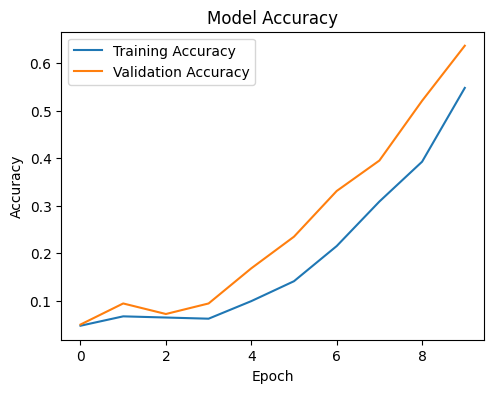

In [10]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

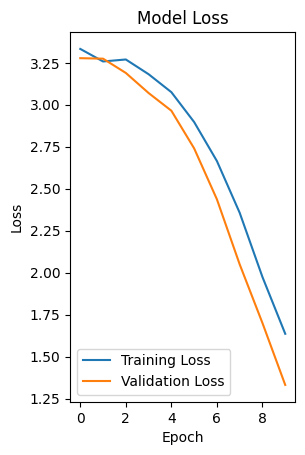

In [11]:
# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')